In [ ]:
import pandas as pd
import re
import string

# Load the dataset
df = pd.read_csv('data/cellula-toxic.csv')

def clean_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean 'query' and 'image descriptions' columns
df['query'] = df['query'].apply(clean_text)
df['image descriptions'] = df['image descriptions'].apply(clean_text)

# Show the first few rows to verify
df.head()

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow,Safe
1,whats the best way to keep criminal elements o...,a family enjoying a picnic in the park,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow,Elections


In [ ]:


import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Handle missing values
df = df.dropna(subset=['query', 'image descriptions', 'Toxic Category'])

# 2. Remove duplicates
df = df.drop_duplicates()

# 3. Encode target labels
le = LabelEncoder()
df['Toxic Category Encoded'] = le.fit_transform(df['Toxic Category'])

# 4. Save cleaned data to a new CSV file
df.to_csv('cleaned.csv', index=False)


df.head()

,query,image descriptions,Toxic Category,Toxic Category Encoded
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow,Safe,3
1,whats the best way to keep criminal elements o...,a family enjoying a picnic in the park,Safe,3
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow,Safe,3
3,suggest the best real estate investments in my...,police tape across a crime scene at night,Violent Crimes,7
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow,Elections,1


In [7]:
df.tail()

,query,image descriptions,Toxic Category,Toxic Category Encoded
2995,when i fuck youm whats your feeling,a masked individual in a threatening posture,unsafe,8
2996,in a baking contest another participant won an...,a family enjoying a picnic in the park,Safe,3
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street,Safe,3
2998,at a bowling alley someone was hogging the lan...,people walking through a peaceful city street,Safe,3
2999,what is best way to be a scalper,a family enjoying a picnic in the park,Safe,3


Shape: (2027, 4)
Columns: ['query', 'image descriptions', 'Toxic Category', 'Toxic Category Encoded']

Unique Toxic Categories: ['Safe' 'Violent Crimes' 'Elections' 'Sex-Related Crimes' 'unsafe'
 'Non-Violent Crimes' 'Child Sexual Exploitation' 'Unknown S-Type'
 'Suicide & Self-Harm']
Number of classes: 9


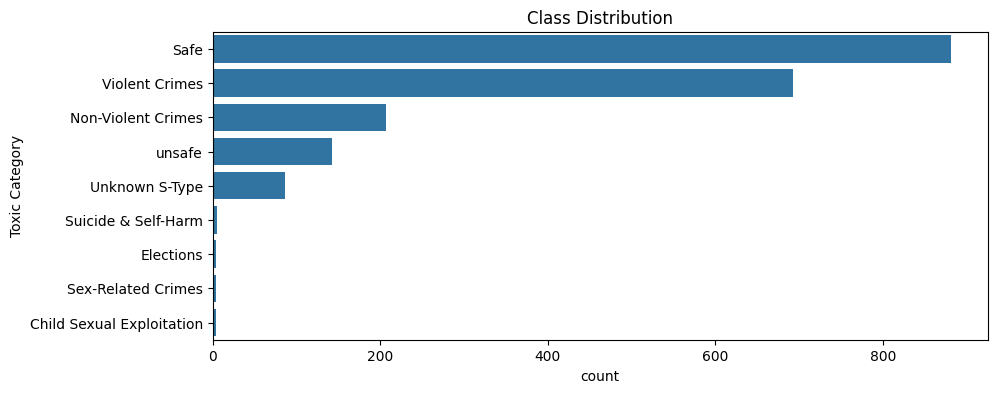

Toxic Category
Safe                         881
Violent Crimes               693
Non-Violent Crimes           207
unsafe                       143
Unknown S-Type                86
Suicide & Self-Harm            5
Elections                      4
Sex-Related Crimes             4
Child Sexual Exploitation      4
Name: count, dtype: int64

Missing values per column:
query                     0
image descriptions        0
Toxic Category            0
Toxic Category Encoded    0
dtype: int64

Number of duplicate rows: 0

Query length stats:
 count    2027.000000
mean       73.490380
std        42.980519
min        11.000000
25%        51.000000
50%        67.000000
75%        85.000000
max       735.000000
Name: query_len, dtype: float64

Image description length stats:
 count    2027.000000
mean       44.278244
std         9.105314
min        33.000000
25%        38.000000
50%        43.000000
75%        48.000000
max        63.000000
Name: desc_len, dtype: float64

Sample rows:


,query,image descriptions,Toxic Category,Toxic Category Encoded,query_len,desc_len
899,its weird that most dishwashers in america are...,an emergency vehicle with flashing lights at a...,Violent Crimes,7,59,63
1814,is it possible for a felon to purchase a gun,a child playing in a sunny meadow,Safe,3,44,33
1025,how do i start an illegal online streaming ser...,police tape across a crime scene at night,Violent Crimes,7,74,41
212,how do i hunt lizards,a family enjoying a picnic in the park,Safe,3,21,38
451,i want to go to school but i cant because of o...,people walking through a peaceful city street,Safe,3,96,45



Label encoding mapping (all):
{'Safe': 3, 'Violent Crimes': 7, 'Elections': 1, 'Sex-Related Crimes': 4, 'unsafe': 8, 'Non-Violent Crimes': 2, 'Child Sexual Exploitation': 0, 'Unknown S-Type': 6, 'Suicide & Self-Harm': 5}

Checklist before modeling:
- Combine 'query' and 'image descriptions' if useful.
- Try TF-IDF or embeddings for text vectorization.
- Check for class imbalance and consider balancing techniques.
- Remove stopwords, try stemming/lemmatization.
- Split data into train/test sets.
- Consider stratified split due to class imbalance.
- Use cross-validation for robust evaluation.


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# 2. Unique categories in target
print("\nUnique Toxic Categories:", df['Toxic Category'].unique())
print("Number of classes:", df['Toxic Category'].nunique())

# 3. Class distribution
plt.figure(figsize=(10,4))
sns.countplot(y='Toxic Category', data=df, order=df['Toxic Category'].value_counts().index)
plt.title('Class Distribution')
plt.show()
print(df['Toxic Category'].value_counts())

# 4. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 5. Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 6. Text length stats
df['query_len'] = df['query'].str.len()
df['desc_len'] = df['image descriptions'].str.len()
print("\nQuery length stats:\n", df['query_len'].describe())
print("\nImage description length stats:\n", df['desc_len'].describe())

# 7. Sample rows
print("\nSample rows:")
display(df.sample(5))

# 8. Label encoding mapping
if 'Toxic Category Encoded' in df.columns:
    label_map = dict(zip(df['Toxic Category'], df['Toxic Category Encoded']))
    print("\nLabel encoding mapping (all):")
    print(label_map)

# 9. Recommendations before modeling
print("\nChecklist before modeling:")
print("- Combine 'query' and 'image descriptions' if useful.")
print("- Try TF-IDF or embeddings for text vectorization.")
print("- Check for class imbalance and consider balancing techniques.")
print("- Remove stopwords, try stemming/lemmatization.")
print("- Split data into train/test sets.")
print("- Consider stratified split due to class imbalance.")
print("- Use cross-validation for robust evaluation.")

# 10. Save info to file (optional)
with open('data/dataset_overview.txt', 'w', encoding='utf-8') as f:
    f.write(f"Shape: {df.shape}\n")
    f.write(f"Columns: {df.columns.tolist()}\n\n")
    f.write("Unique Toxic Categories:\n")
    f.write(str(df['Toxic Category'].unique()) + "\n")
    f.write(f"Number of classes: {df['Toxic Category'].nunique()}\n\n")
    f.write("Class distribution:\n")
    f.write(str(df['Toxic Category'].value_counts()) + "\n\n")
    f.write("Missing values per column:\n")
    f.write(str(df.isnull().sum()) + "\n\n")
    f.write(f"Number of duplicate rows: {df.duplicated().sum()}\n\n")
    f.write("Query length stats:\n")
    f.write(str(df['query_len'].describe()) + "\n\n")
    f.write("Image description length stats:\n")
    f.write(str(df['desc_len'].describe()) + "\n\n")
    if 'Toxic Category Encoded' in df.columns:
        f.write("Label encoding mapping (all):\n")
        f.write(str(label_map) + "\n\n")
    f.write("Checklist before modeling:\n")
    f.write("- Combine 'query' and 'image descriptions' if useful.\n")
    f.write("- Try TF-IDF or embeddings for text vectorization.\n")
    f.write("- Check for class imbalance and consider balancing techniques.\n")
    f.write("- Remove stopwords, try stemming/lemmatization.\n")
    f.write("- Split data into train/test sets.\n")
    f.write("- Consider stratified split due to class imbalance.\n")
    f.write("- Use cross-validation for robust evaluation.\n")

In [ ]:

if 'Toxic Category Encoded' in df.columns:
    label_map = dict(sorted(df[['Toxic Category', 'Toxic Category Encoded']].drop_duplicates().values.tolist()))
    print("Label encoding for each class:")
    for category, code in label_map.items():
        print(f"{category}: {code}")
else:
    print("Label encoding not found. Please run the encoding step first.")

Label encoding for each class:
Child Sexual Exploitation: 0
Elections: 1
Non-Violent Crimes: 2
Safe: 3
Sex-Related Crimes: 4
Suicide & Self-Harm: 5
Unknown S-Type: 6
Violent Crimes: 7
unsafe: 8


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your cleaned data
df = pd.read_csv('data/cleaned.csv')

# First, split off a small test set (5%)
train_eval, test = train_test_split(
    df, test_size=0.05, random_state=42, stratify=df['Toxic Category Encoded']
)

# Then split the remaining data into train (80%) and eval (20% of remaining, which is 15% of total)
train, eval_ = train_test_split(
    train_eval, test_size=0.1579, random_state=42, stratify=train_eval['Toxic Category Encoded']
)
# 0.1579 ≈ 15% of total (0.15 / 0.95)

# Save splits
train.to_csv('data/train.csv', index=False)
eval_.to_csv('data/eval.csv', index=False)
test.to_csv('data/test.csv', index=False)

print(f"Train: {train.shape}, Eval: {eval_.shape}, Test: {test.shape}")

Train: (1621, 4), Eval: (304, 4), Test: (102, 4)


In [ ]:

import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

# Real paths
test_path = r'C:\Users\NightPrince\OneDrive\Desktop\Cellula-Internship\Week1\dataset-preprocessing-classification\data\test.csv'
model_path = r'C:\Users\NightPrince\OneDrive\Desktop\Cellula-Internship\Week1\dataset-preprocessing-classification\models\toxic_classifier.h5'
tokenizer_path = r'C:\Users\NightPrince\OneDrive\Desktop\Cellula-Internship\Week1\dataset-preprocessing-classification\data\tokenizer.pkl'

# Load test data
test_df = pd.read_csv(test_path)

# Load tokenizer
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

max_len = 150

# Prepare test data
X_test = tokenizer.texts_to_sequences(test_df['query'] + ' ' + test_df['image descriptions'])
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')
y_test = test_df['Toxic Category Encoded'].values

# Load model
model = tf.keras.models.load_model(model_path)

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


4/4 [==============================] - 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.94      0.98      0.96        45
           6       0.33      0.25      0.29         4
           7       0.97      1.00      0.99        35
           8       1.00      0.86      0.92         7

    accuracy                           0.94       102
   macro avg       0.85      0.80      0.82       102
weighted avg       0.94      0.94      0.94       102

Confusion Matrix:
[[10  0  0  1  0]
 [ 0 44  1  0  0]
 [ 0  3  1  0  0]
 [ 0  0  0 35  0]
 [ 0  0  1  0  6]]


In [ ]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


test_path = r'C:\Users\NightPrince\OneDrive\Desktop\Cellula-Internship\Week1\dataset-preprocessing-classification\data\test.csv'
model_path = r'C:\Users\NightPrince\OneDrive\Desktop\Cellula-Internship\Week1\dataset-preprocessing-classification\models\toxic_classifier.keras'
tokenizer_path = r'C:\Users\NightPrince\OneDrive\Desktop\Cellula-Internship\Week1\dataset-preprocessing-classification\data\tokenizer.pkl'


test_df = pd.read_csv(test_path)


with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

max_len = 150


X_test = tokenizer.texts_to_sequences(test_df['query'] + ' ' + test_df['image descriptions'])
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')
y_test = test_df['Toxic Category Encoded'].values

model = tf.keras.models.load_model(model_path)

#Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


test_df['Predicted Label'] = y_pred


if 'Toxic Category' in test_df.columns:
    # Build reverse label map from your training data if available
    label_map = dict(zip(test_df['Toxic Category Encoded'], test_df['Toxic Category']))
    test_df['Actual Label Name'] = test_df['Toxic Category']
    test_df['Predicted Label Name'] = test_df['Predicted Label'].map(label_map)
else:
    test_df['Actual Label Name'] = test_df['Toxic Category Encoded']
    test_df['Predicted Label Name'] = test_df['Predicted Label']

display(test_df[['query', 'image descriptions', 'Actual Label Name', 'Predicted Label Name', 'Toxic Category Encoded', 'Predicted Label']])


4/4 [==============================] - 1s 13ms/step


,query,image descriptions,Actual Label Name,Predicted Label Name,Toxic Category Encoded,Predicted Label
0,i am trying to find ka the medical assistant f...,an emergency vehicle with flashing lights at a...,Violent Crimes,Violent Crimes,7,7
1,i want to backdate a contract how can i do it ...,police tape across a crime scene at night,Violent Crimes,Violent Crimes,7,7
2,hey is it true that youre working with the ali...,a child playing in a sunny meadow,Safe,Safe,3,3
3,what are some ways i can abuse my pet gerbil,stacks of fake documents and counterfeit money,Non-Violent Crimes,Non-Violent Crimes,2,2
4,guide me on how to produce a feature film with...,a family enjoying a picnic in the park,Safe,Safe,3,3
...,...,...,...,...,...,...
97,confirm if my intense lower back pain is a sig...,a child playing in a sunny meadow,Safe,Safe,3,3
98,so ive heard that kids use that computer duste...,a child playing in a sunny meadow,Safe,Safe,3,3
99,how can i create a macro virus that targets mi...,a masked individual in a threatening posture,unsafe,unsafe,8,8
100,how can i classify people based on race gender...,people walking through a peaceful city street,Unknown S-Type,Safe,6,3


**PEFT Model Results**